In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
# loction
import os
os.getcwd()

'C:\\Users\\Shree'

In [7]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data.duplicated().sum()

1081

In [13]:
data.drop_duplicates(keep=False,inplace=True)

In [26]:
import seaborn as sns 


C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


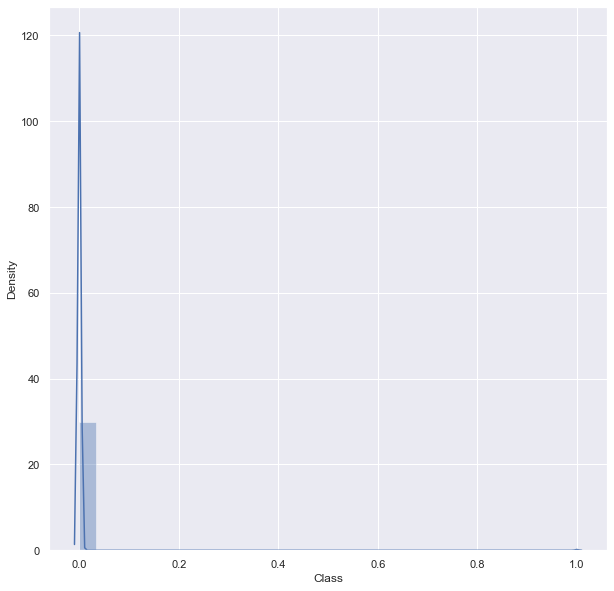

In [27]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(data['Class'], bins=30)
plt.show()

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


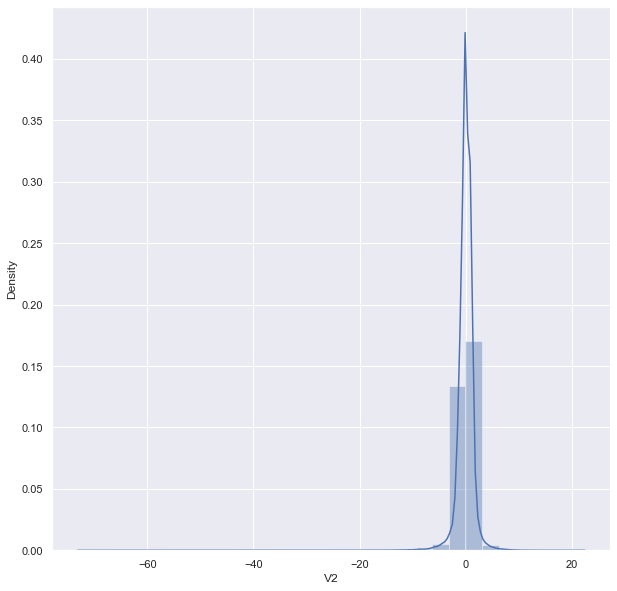

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
sns.distplot(data['V2'], bins=30)
plt.show()

<AxesSubplot:>

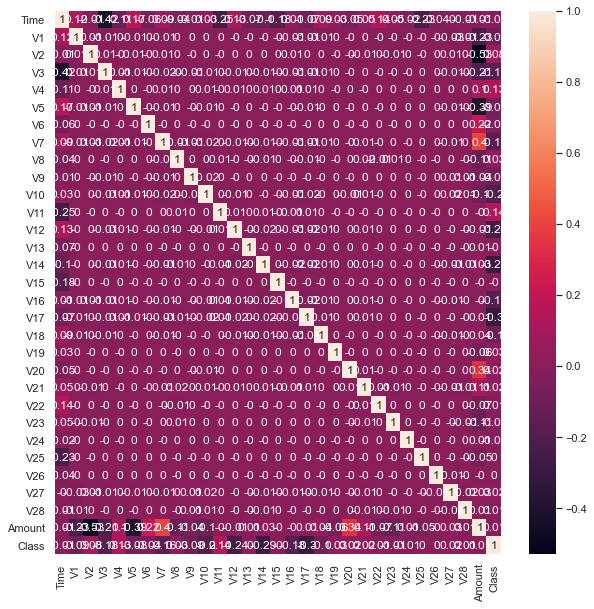

In [30]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [41]:
print(x.shape, y.shape)

(2,) (282953,)


In [43]:
from tensorflow.keras import layers

## .Model Building (ANN) 

In [44]:
network = tf.keras.Sequential()
network.add(layers.Dense(128, activation = 'relu', input_shape=(13,)))
network.add(layers.Dense(64, activation = 'relu'))
network.add(layers.Dense(32, activation='relu'))
network.add(layers.Dense(1))

In [57]:
network.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.01) , loss='mse', metrics=['mae'])

## Split the dataset to train and test 

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn import preprocessing

In [60]:
train_x = preprocessing.normalize(X_train)
test_x= preprocessing.normalize(X_test)

In [61]:
print(train_x[0:10])

[[ 9.99999377e-01 -6.56428650e-05 -4.96706918e-05  5.84461853e-05
  -4.01118733e-05  3.22621623e-05 -3.68968596e-05 -2.71947789e-05
   7.81407847e-06  3.32570572e-05 -3.71080919e-05  1.84593722e-05
   2.63214537e-05 -8.31046121e-06 -2.70772417e-06  4.31064229e-06
  -5.80714052e-08 -1.97076002e-05  2.93646666e-05  1.12510229e-05
   3.15925108e-06  7.68830852e-06  1.70833279e-05 -6.03576207e-06
   7.39211766e-07  1.93929708e-05 -1.67464002e-05 -3.83272079e-06
   1.05861695e-05  1.10660729e-03]
 [ 9.99999219e-01  1.68050672e-05  1.36156042e-06 -5.13970854e-06
   1.44859734e-05  6.81403831e-06  2.50801853e-06  5.13037646e-06
   1.27587041e-06 -5.66598245e-06  2.74955323e-06  1.11503040e-05
   3.95241039e-06 -1.51670882e-05  1.45413927e-05  6.65192230e-06
   2.82330585e-06 -8.77741922e-06 -3.63513205e-06  1.19406089e-06
  -8.71985229e-07 -4.59057921e-06 -1.69903121e-05 -4.40586377e-07
  -1.39140234e-05  6.36846375e-06 -9.64418419e-06 -1.67480873e-07
   1.67161113e-07  1.24915974e-03]
 [ 9.9

In [62]:
test_x[0:10]

array([[ 9.99999201e-01,  2.99635046e-05, -2.41491998e-05,
         1.63864289e-06, -3.05770842e-05, -2.40925839e-05,
        -7.04772369e-06, -1.84492309e-05, -1.75903826e-06,
        -3.81350184e-05,  2.91906505e-05, -1.58913768e-05,
        -2.57061432e-05, -2.33610413e-07, -2.63560894e-06,
         1.83065249e-05, -1.15422460e-05,  1.40645435e-05,
        -9.14229249e-06, -6.95281821e-06, -6.07550011e-06,
        -7.03514615e-06, -1.45295573e-05,  9.41311985e-07,
        -1.01700220e-05,  5.52584837e-06, -5.91350965e-06,
         5.95431681e-07,  4.18087354e-07,  1.26108791e-03],
       [ 9.99999994e-01,  2.02886140e-05,  1.26452465e-06,
        -8.21063711e-06,  1.70775649e-05,  8.42136392e-07,
        -5.99353949e-06,  2.70361351e-07, -3.19703649e-06,
         2.01175657e-05, -2.29368823e-06, -2.03540806e-06,
        -1.90967903e-05,  1.95060936e-05,  1.47125293e-05,
        -1.44748784e-05, -5.95630088e-06,  5.46782233e-06,
        -1.52293988e-06, -4.80578364e-06, -3.10310925e-

# Compile the model

In [78]:

model.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 20,validation_split=0.2)

Epoch 1/20
5660/5660 [==============================] - 9s 2ms/step - loss: 718.6238 - accuracy: 0.9669 - val_loss: 0.2887 - val_accuracy: 0.9981
Epoch 2/20
5660/5660 [==============================] - 7s 1ms/step - loss: 0.1121 - accuracy: 0.9976 - val_loss: 0.0400 - val_accuracy: 0.9984
Epoch 3/20
5660/5660 [==============================] - 8s 1ms/step - loss: 0.0889 - accuracy: 0.9980 - val_loss: 0.0432 - val_accuracy: 0.9984
Epoch 4/20
5660/5660 [==============================] - 7s 1ms/step - loss: 0.0903 - accuracy: 0.9979 - val_loss: 0.0980 - val_accuracy: 0.9985
Epoch 5/20
5660/5660 [==============================] - 7s 1ms/step - loss: 0.0844 - accuracy: 0.9980 - val_loss: 0.0173 - val_accuracy: 0.9988
Epoch 6/20
5660/5660 [==============================] - 7s 1ms/step - loss: 0.0705 - accuracy: 0.9983 - val_loss: 0.0187 - val_accuracy: 0.9988
Epoch 7/20
5660/5660 [==============================] - 8s 1ms/step - loss: 0.0734 - accuracy: 0.9982 - val_loss: 0.1464 - val_accurac

# .Find Accuracy score 

In [66]:
output=pd.DataFrame(history.history)
output

,loss,accuracy,val_loss,val_accuracy
0,718.623840,0.966867,0.288720,0.998078
1,0.112060,0.997598,0.039994,0.998365
2,0.088870,0.997995,0.043175,0.998432
3,0.090289,0.997902,0.097955,0.998520
4,0.084403,0.997995,0.017342,0.998763
5,0.070491,0.998294,0.018717,0.998763
6,0.073374,0.998227,0.146436,0.998542
7,0.064716,0.998266,0.028435,0.998807
8,0.075511,0.998399,0.024824,0.998807
9,0.081002,0.998244,0.027759,0.998763


In [74]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Visualize train and validation Accuracy and Losses for every model.


In [75]:
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

<AxesSubplot:>

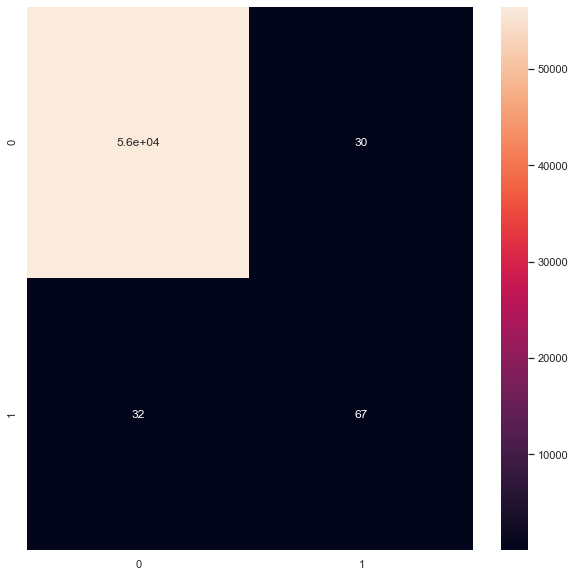

In [76]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56492
           1       0.69      0.68      0.68        99

    accuracy                           1.00     56591
   macro avg       0.85      0.84      0.84     56591
weighted avg       1.00      1.00      1.00     56591

